In [10]:
! pip show midii

Name: midii
Version: 0.1.15
Summary: Midi Insights: midi analyzer
Home-page: 
Author: 
Author-email: ccss17 <chansol0505@naver.com>
License: MIT License

Copyright (c) 2025 Chansol Han

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import midii
import copy
from pathlib import Path

In [7]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)
Path(mid.filename).name

'ba_05688_-4_a_s02_m_02.mid'

In [13]:
mid.lyrics

AttributeError: 'MidiFile' object has no attribute 'lyrics'

In [8]:
def calculate_absolute_times(delta_times):
    """Calculates absolute times from delta times."""
    return np.cumsum(np.array(delta_times, dtype=np.int64))

In [9]:
# --- Generate Data for Plotting ---
original_abs_times = calculate_absolute_times(mid.times)

mid2 = copy.deepcopy(mid)
mid2.quantize(error_forwarding=False)
quantized_abs_times_naive = calculate_absolute_times(mid2.times)

mid.quantize()
quantized_abs_times_with_EF = calculate_absolute_times(mid.times)

# Calculate drift (deviation from original absolute time)
drift_naive = quantized_abs_times_naive - original_abs_times
drift_with_EF = quantized_abs_times_with_EF - original_abs_times

# Use event index as x-axis for simplicity
event_index = np.arange(len(mid.times))

AttributeError: 'MidiFile' object has no attribute 'times'

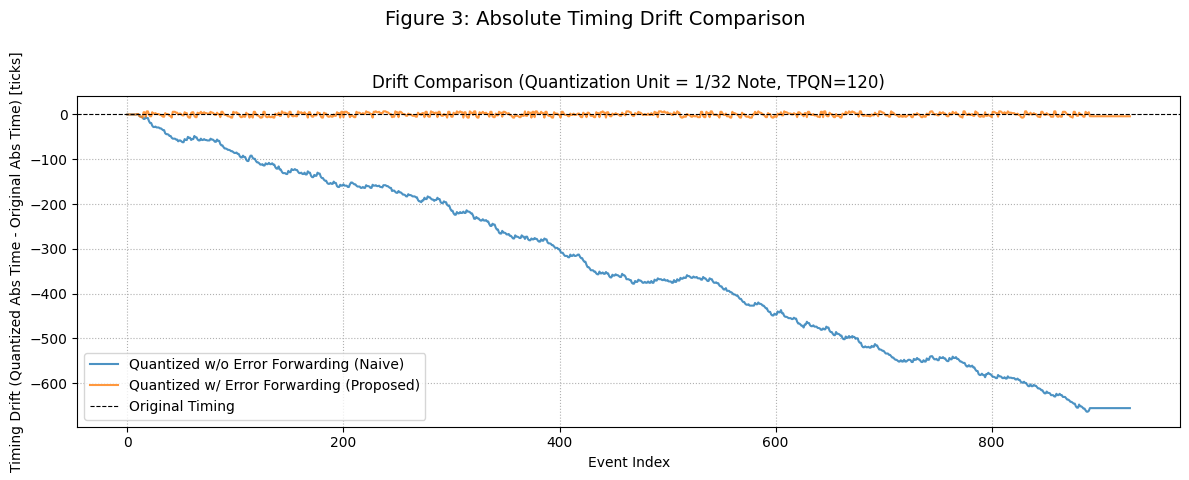

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
# fig.suptitle('Figure 3: Absolute Timing Drift Comparison', fontsize=14)

ax.plot(event_index, drift_naive, label='Quantized w/o Error Forwarding (Naive)', alpha=0.8, linewidth=1.5)
ax.plot(event_index, drift_with_EF, label='Quantized w/ Error Forwarding (Proposed)', alpha=0.8, linewidth=1.5)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Original Timing')
ax.set_xlabel("Event Index")
ax.set_ylabel("Timing Drift (Quantized Abs Time - Original Abs Time) [ticks]")
ax.set_title(f"Drift Comparison (Quantization Unit = 1/{int(4/0.125)} Note, TPQN={mid.ticks_per_beat})")
ax.grid(True, linestyle=':')
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Use plt.savefig('figure3_drift_comparison.png', dpi=300) for paper